In [1]:
import cv2

cam = cv2.VideoCapture(0) # VideoCpature(0) grabs the default camera

cv2.namedWindow("test")

img_counter = 0 # to count the number of images being captured when Space is clicked

while True:
    ret, frame = cam.read() #tuple unpacking , frame variable gets the camera input
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:    #if user has waited atleast 1ms(frame time) and pressed Esc key(=27), we can stop the infinite running code
        # ESC pressed
        print("Escape hit, closing window...") #to check code
        break
    elif k%256 == 32:
        # SPACE pressed so image captured and saved 
        img_name = "opencv_mnist_{}.png".format(img_counter) # image to be saved as this named file
        cv2.imwrite(img_name, frame)   # save frame variable image 
        print("{} saved".format(img_name)) #to check code
        img_counter += 1 # count the number of times user presses space to capture image

cam.release()

cv2.destroyAllWindows()

opencv_mnist_0.png saved
Escape hit, closing window...


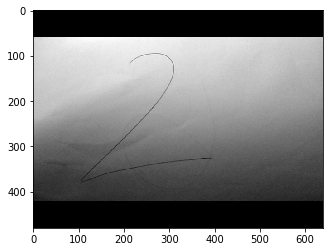

In [2]:
# reading saved image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img=cv2.imread('opencv_mnist_0.png',cv2.IMREAD_GRAYSCALE)
#read image in grayscale to apply thresholding
plt.imshow(img,cmap='gray')

In [4]:
a=np.array(img)

In [5]:
a.ndim

2

In [6]:
a.size

307200

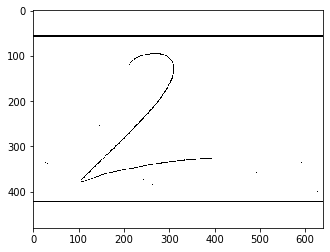

In [8]:
# image preprocessing -- image thresholding 
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,13,7)
new_img=th2
plt.imshow(new_img,cmap='gray')

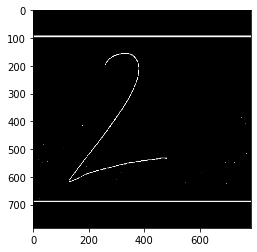

In [9]:
resized_img = cv2.resize(new_img, (784, 784)) #resize gray scale image to 28x28 pixels
resized_img = resized_img.astype('float32')
resized_img = resized_img.reshape(784,784) #reshaping to support our model input and normalizing
resized_img = 255-resized_img #image inversion
resized_img = resized_img / 255.0
plt.imshow(resized_img,cmap='gray')

In [10]:
resized_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
# loading model for prediction
import joblib
classifier = joblib.load("model.pkl")
y_pred_mnist=classifier.predict(resized_img)

In [12]:
y_pred_mnist.flatten()

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 2, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 7, 7, 7, 5, 5, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
y_pred_mnist.shape

(784,)

In [14]:
y_pred_mnist.ndim

1

In [15]:
y_pred_mnist=np.asarray(y_pred_mnist) #convert pandas series to nd array

In [16]:
y_pred_mnist.size

784

In [17]:
import pandas as pd
dataset_train=pd.read_csv('mnist_train.csv') #importing dataset for comparing

In [27]:
one= dataset_train.iloc[0, 1:] #1st column is the label column at index 0
one = np.asarray(one)
two = dataset_train.iloc[1, 1:] #1st column is the label column at index 0
two = np.asarray(two)
three = dataset_train.iloc[2, 1:] #1st column is the label column at index 0
three = np.asarray(three)
four = dataset_train.iloc[3, 1:] #1st column is the label column at index 0
four = np.asarray(four)
five = dataset_train.iloc[4, 1:] #1st column is the label column at index 0
five = np.asarray(five)
six = dataset_train.iloc[5, 1:] #1st column is the label column at index 0
six = np.asarray(six)
seven = dataset_train.iloc[6, 1:] #1st column is the label column at index 0
seven = np.asarray(seven)
eight = dataset_train.iloc[7, 1:] #1st column is the label column at index 0
eight = np.asarray(eight)
nine = dataset_train.iloc[8, 1:] #1st column is the label column at index 0
nine = np.asarray(nine)

In [28]:
nine.shape

(784,)

In [29]:
nine.size

784

In [30]:
type(nine)

numpy.ndarray

In [31]:
if all(y_pred_mnist==one)==True:
    print("The predicted digit is ONE")
elif all(y_pred_mnist==two)==True:
    print("The predicted digit is TWO")
elif all(y_pred_mnist==three)==True:
    print("The predicted digit is THREE")
elif all(y_pred_mnist==four)==True:
    print("The predicted digit is FOUR")
elif all(y_pred_mnist==five)==True:
    print("The predicted digit is FIVE")
elif all(y_pred_mnist==six)==True:
    print("The predicted digit is SIX")
elif all(y_pred_mnist==seven)==True:
    print("The predicted digit is SEVEN")
elif all(y_pred_mnist==eight)==True:
    print("The predicted digit is EIGHT")
elif all(y_pred_mnist==nine)==True:
    print("The predicted digit is NINE")
else:
    print("OOPS! Digit unmatched..")

OOPS! Digit unmatched..


In [32]:
two = 255-two #image inversion
two = two/255.0
two

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     